In [64]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [65]:
comments=pd.read_csv(r'C:\Users\Admin\Desktop\Youtube analysis Project\YT Data/UScomments.csv',error_bad_lines=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14972\2686568348.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  comments=pd.read_csv(r'C:\Users\Admin\Desktop\Youtube analysis Project\YT Data/UScomments.csv',error_bad_lines=False)
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\Admin\AppData\Local\Temp\ipykernel_14972\2686568348.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments=pd.read_csv(r'C:\Users\Admin\Desktop\Youtube analysis Project\YT Data/UScomments.csv',error_bad_lines=False)


To avoid ParserError which arises when we have delimiters in csv file other than commas such as /t, we use error_bad_lines=False

In [3]:
comments.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0

What is TextBlob Library?   https://textblob.readthedocs.io/en/dev/

For Sentiment Analysis, we can use Vader and Spacy. But as of now, just focusing on Text Blob.

Sentiment Analaysis? https://textblob.readthedocs.io/en/dev/quickstart.html#sentiment-analysis

The function dataframe. isnull(). sum(). sum() returns the number of missing values in the dataset.

In [66]:
comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

We have 25 missing comments.

The dropna() method removes the rows that contains NULL values. The dropna() method returns a new DataFrame object unless the inplace parameter is set to True , in that case the dropna() method does the removing in the original DataFrame instead.

In [67]:
comments.dropna(inplace=True) #Removing empty comments.

In [68]:
comments.isnull().sum()    #Checking if got removed.

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [69]:
!pip install textblob

In [70]:
from textblob import TextBlob

In [10]:
TextBlob('trending 😉').sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [11]:
TextBlob('trending 😉').sentiment.polarity

0.0

In [71]:
df=comments[1:10000]

In [72]:
polarity=[]
for comment in df["comment_text"]:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, -0.13571428571428573]

In [73]:
df['polarity']=polarity

C:\Users\Admin\AppData\Local\Temp\ipykernel_14972\4273527468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity']=polarity


In [74]:
df.head(14)

video_id                                       comment_text likes  \
1   XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2   XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3   XpVt6Z1Gjjo                                MY FAN . attendance     3   
4   XpVt6Z1Gjjo                                         trending 😉     3   
5   XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   
6   XpVt6Z1Gjjo                               The end though 😭👍🏻❤️     4   
7   XpVt6Z1Gjjo                               #1 trending!!!!!!!!!     3   
8   XpVt6Z1Gjjo                        Happy one year vlogaversary     3   
9   XpVt6Z1Gjjo  You and your shit brother may have single hand...     0   
10  XpVt6Z1Gjjo             There should be a mini Logan Paul too!     0   
11  XpVt6Z1Gjjo  Dear Logan, I really wanna get your Merch but ...     0   
12  XpVt6Z1Gjjo  Honestly Evan is so annoying. Like its not fun...     0   
13  XpVt6Z1Gjjo                   Casey is still better then logan     0   
14  XpVt6Z1Gjjo      aw geez rick this guy is the face of YouTube.     0   

   replies  polarity  
1        0  0.000000  
2        0  0.000000  
3        0  0.000000  
4        0  0.000000  
5        0  0.000000  
6        0  0.000000  
7        0  0.000000  
8        0  0.800000  
9        0 -0.135714  
10       0  0.000000  
11       0  0.200000  
12       0 -0.023333  
13       0  0.500000  
14       0  0.000000

# WORDCLOUD OF POSITIVE AND NEGATIVE SENTIMENTS..


What is WordCloud? https://www.geeksforgeeks.org/generating-word-cloud-python/

In [13]:
df_positive=df[df['polarity']==1]
df_positive

video_id                                       comment_text likes  \
64    XpVt6Z1Gjjo                                    yu are the best     1   
156   cLdxuaxaQwc  Power is the disease.  Care is the cure.  Keep...     0   
227   WYYvHb03Eog  YAS Can't wait to get it! I just need to sell ...     0   
307   sjlHnJvXdQs                                  This is priceless     0   
319   sjlHnJvXdQs                                Summed up perfectly     0   
...           ...                                                ...   ...   
9841  3x-sUsazQ90                         Great video and narration!     0   
9842  3x-sUsazQ90                          This is really impressive     0   
9844  3x-sUsazQ90  Placed an order yesterday. Will be patiently w...     0   
9889  7Lyo5dCig-U                    That would honestly be me, lol!     0   
9993  lwOQbMcXtfU  perfect opportunity for these metal detector d...     0   

     replies  polarity  
64         0       1.0  
156        0       1.0  
227        0       1.0  
307        0       1.0  
319        0       1.0  
...      ...       ...  
9841       0       1.0  
9842       0       1.0  
9844       0       1.0  
9889       0       1.0  
9993       0       1.0  

[246 rows x 5 columns]

In [14]:
df_negative=df[df['polarity']==-1]
df_negative

video_id                                       comment_text likes  \
512   8wNr-NQImFg  BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...     0   
562   8wNr-NQImFg  Well… The brain surgeon Ben Carson just proved...     0   
952   Ayb_2qbZHm4         WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!     0   
1371  vu_9muoxT50                                     WTF BRUH!!!!!!     0   
1391  vu_9muoxT50                    cheeseus christ thats insane!!!     0   
1932  -Ifnaxi2LQg          this is the worst thing i've heard. ever.     0   
2043  B7YaMkCl3XA  Economy is horrible in Cuba. It's going to be ...     0   
2088  B7YaMkCl3XA                      Sub to me if this is terrible     0   
2192  5ywKal6-anc                                           PATHETIC     1   
2410  EVp4-qjWVJE  I don't like this sportscaster  sounds very an...     0   
2482  EVp4-qjWVJE                             commentators are awful     0   
2728  1ZNZY-gd3K0  This tv show became trump witch hunt tube... a...     0   
2733  1ZNZY-gd3K0  Arpaio should be arrested again for horribly b...     0   
2750  1ZNZY-gd3K0      This  show has become one-noted and pathetic.     0   
2817  2wxyDrfwlXQ                              HARD CANDY!!!!!!!!!!!     0   
2886  2wxyDrfwlXQ                Tired of the philosophy add !!!!!!!     0   
3086  ql0Op1VcELw                                             boring     0   
3092  ql0Op1VcELw                  0:22   **laughs at terrible pun**     1   
3222  GGm0FQ6i74U  Why is media even covering this disgusting wom...     0   
3371  a7Sf_H2cFdM                       How is this trending ? Awful     0   
3514  l_uNfGY3v8E  a horrible attempt to try and get us to freak out     0   
3529  l_uNfGY3v8E     this is one of the worst videos I've ever seen     0   
3561  l_uNfGY3v8E                  Whats with the horrible music? tf     0   
4006  qJJHhVf3_ZM                                  She is the worst.    10   
4094  qJJHhVf3_ZM                                             Boring     2   
4481  L3f7_y9UPh4                                             boring     0   
4699  WoPtuVbaSKQ  Pls make star vs the forces of evil cookies or...     0   
4924  NzRuDD0iYC0                                Oliver is an idiot!     0   
5397  LTnl36-0-zU  I won't read this comment. What a Dick I am, I...     0   
5551  c7ymY8QEB2g                                           Terrible     0   
5773  08RHSZvixec      They got the worst brand of honey soy chips 😂     1   
5920  GpAuCG6iUcA  Please let this die, you can tell the actors a...     0   
5943  GpAuCG6iUcA                                     can't wait :'(     0   
5959  GpAuCG6iUcA  Don't be bringing cucumbers to the theaters th...     0   
6083  eRDxDEhEgNY  OMG...he's Stephen FUCKING Hawkings !!!!   (sa...     0   
6263  xKXxJcf6_IE               Does Tommy knows that he's horrible?     0   
6442  YQYslaA1Lus                                       Insane album     0   
6592  brfJuyTADuQ                                     this is boring     0   
7698  1Sm8A-u1vIA  The ripping of the evil Qur’aan and If I am no...     1   
7742  JsTptu56GM8        Whoever did your makeup did a terrible job.     0   
7978  tteLMfFDCb4  Her book should be titled, Damn I can't even b...     0   
7979  tteLMfFDCb4  The like to dislike ratio to this video is jus...     0   
8283  B_CHjYoqPUU  Is she into you? If you watch I video like thi...     0   
8365  kCKTmL5Hn-M  Do you guys JUST hate it when people edit thei...     0   
8435  N4Jb3gkrGXI                    she has the worst fashion sense     0   
8570  0Yhaei1S5oQ  3:33 to 3:36 they would jerk around uncontroll...     0   
9150  LpZqwLZP5Vs  Prayers to everyone who was affected by this t...     0   
9225  LpZqwLZP5Vs  9/11 was a terrible day but it did bring all A...     1   
9233  fCh5TVGaTSg       she's horrible, stop hiring for looks alone.    82   
9241  fCh5TVGaTSg                                        She's awful    12   
9277  fCh5TVGaTSg          Ever

In [15]:
!pip install wordcloud


In [16]:
total_comments= " ".join(df_negative["comment_text"])

what are stopwords? https://www.geeksforgeeks.org/removing-stop-words-nltk-python/

In [43]:
total_comments[1:10]

'EN CARSON'

In [17]:
from wordcloud import WordCloud, STOPWORDS

(-0.5, 399.5, 199.5, -0.5)

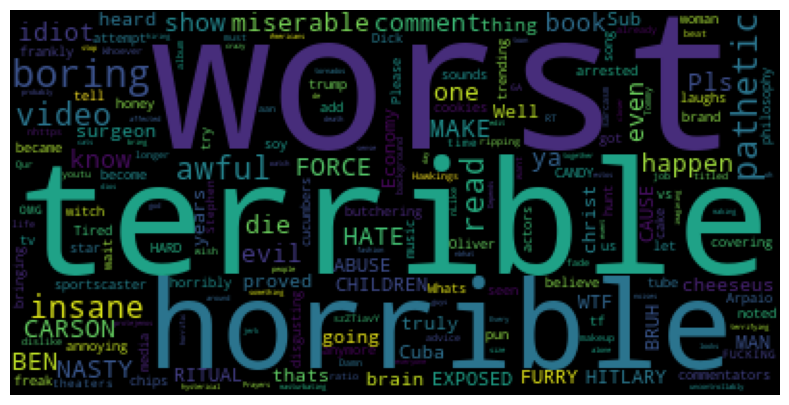

In [18]:
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)   #.imshow() for plotting image.
plt.axis('off')


In [19]:
positive_comments=" ".join(df_positive["comment_text"])

In [49]:
positive_comments[1:16]

'u are the best '

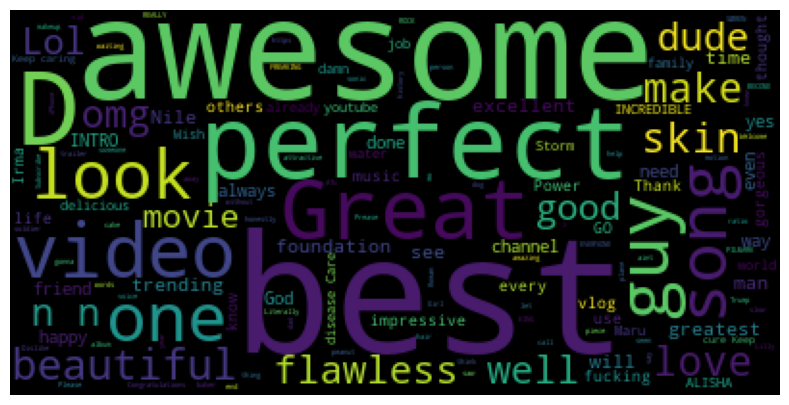

In [20]:
wordcloud2=WordCloud(stopwords=set(STOPWORDS)).generate(positive_comments)
plt.figure(figsize=(15,5))
plt.axis("off")
plt.imshow(wordcloud2)

# Emoji Analysis

In [21]:
!pip install emoji

In [22]:
import emoji

In [75]:
df.head(14)

video_id                                       comment_text likes  \
1   XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2   XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3   XpVt6Z1Gjjo                                MY FAN . attendance     3   
4   XpVt6Z1Gjjo                                         trending 😉     3   
5   XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   
6   XpVt6Z1Gjjo                               The end though 😭👍🏻❤️     4   
7   XpVt6Z1Gjjo                               #1 trending!!!!!!!!!     3   
8   XpVt6Z1Gjjo                        Happy one year vlogaversary     3   
9   XpVt6Z1Gjjo  You and your shit brother may have single hand...     0   
10  XpVt6Z1Gjjo             There should be a mini Logan Paul too!     0   
11  XpVt6Z1Gjjo  Dear Logan, I really wanna get your Merch but ...     0   
12  XpVt6Z1Gjjo  Honestly Evan is so annoying. Like its not fun...     0   
13  XpVt6Z1Gjjo                   Casey is still better then logan     0   
14  XpVt6Z1Gjjo      aw geez rick this guy is the face of YouTube.     0   

   replies  polarity  
1        0  0.000000  
2        0  0.000000  
3        0  0.000000  
4        0  0.000000  
5        0  0.000000  
6        0  0.000000  
7        0  0.000000  
8        0  0.800000  
9        0 -0.135714  
10       0  0.000000  
11       0  0.200000  
12       0 -0.023333  
13       0  0.500000  
14       0  0.000000

In [24]:
print('\U0001F600')

😀


In [81]:
comment='trending 😉'

In [29]:
[c for c in comment if c in emoji.UNICODE_EMOJI_ENGLISH]

AttributeError: module 'emoji' has no attribute 'UNICODE_EMOJI_ENGLISH'

In [30]:
emoji.__version__


'2.2.0'

In [39]:
!pip uninstall emoji

^C


In [40]:
!pip install emoji--1.6.1

ERROR: Could not find a version that satisfies the requirement emoji--1.6.1 (from versions: none)
ERROR: No matching distribution found for emoji--1.6.1


In [76]:
!pip install emoji==1.6.1


In [77]:
import emoji

In [78]:
[c for c in comment if c in emoji.UNICODE_EMOJI]

AttributeError: module 'emoji' has no attribute 'UNICODE_EMOJI'

In [83]:
[c for c in comment if c in emoji.distinct_emoji_list(c)]

['😉']

emoji.UNICODE_EMOJI got outdated.. hence use distinct_emoji_list(c)

In [58]:
df.dropna(inplace=True)

In [89]:
emoji_list=[]

for comment in df['comment_text']:
    for char in comment:
        if char in emoji.distinct_emoji_list(char):
            emoji_list.append(char)

In [90]:
len(emoji_list)

2860

In [91]:
emoji_list[1:10]

['😭', '👍', '🏻', '❤', '😍', '💋', '💙', '👍', '👈']

In [53]:
for comment in comments['comment_text']:

IndentationError: expected an indented block (3228373554.py, line 1)

In [87]:
emoji.distinct_emoji_list('trending')

[]

In [93]:
from collections import Counter

In [94]:
Counter(emoji_list)

Counter({'😉': 9,
         '😭': 52,
         '👍': 56,
         '🏻': 46,
         '❤': 268,
         '😍': 323,
         '💋': 18,
         '💙': 7,
         '👈': 10,
         '😂': 610,
         '🔥': 68,
         '👻': 1,
         '💎': 1,
         '😆': 25,
         '😁': 26,
         '😒': 3,
         '👏': 47,
         '😊': 68,
         '👌': 41,
         '🤔': 18,
         '💔': 2,
         '👎': 10,
         '🍎': 2,
         '😤': 2,
         '😢': 19,
         '👫': 4,
         '💘': 5,
         '😻': 17,
         '💖': 54,
         '🌟': 8,
         '😮': 38,
         '👇': 2,
         '😳': 10,
         '😠': 3,
         '😴': 6,
         '😝': 1,
         '™': 1,
         '☺': 10,
         '😔': 4,
         '😩': 21,
         '😡': 1,
         '🙏': 39,
         '😄': 14,
         '😬': 3,
         '☹': 2,
         '🤷': 2,
         '🤣': 30,
         '😃': 18,
         '🏽': 11,
         '🍏': 1,
         '😓': 6,
         '🤦': 3,
         '♀': 2,
         '😞': 14,
         '🏼': 24,
         '✌': 10,
         '💀': 

In [95]:
Counter(emoji_list).most_common(10)

[('😂', 610),
 ('😍', 323),
 ('❤', 268),
 ('🔥', 68),
 ('😊', 68),
 ('👍', 56),
 ('💖', 54),
 ('😭', 52),
 ('💕', 51),
 ('👏', 47)]

In [99]:
emojis=[Counter(emoji_list).most_common()[i][0] for i in range(10)]

In [100]:
emojis

['😂', '😍', '❤', '🔥', '😊', '👍', '💖', '😭', '💕', '👏']

In [101]:
freqs=[Counter(emoji_list).most_common()[i][1] for i in range(10)]

In [102]:
freqs

[610, 323, 268, 68, 68, 56, 54, 52, 51, 47]

In [103]:
import matplotlib.pyplot as plt

In [106]:
%matplotlib notebook

<IPython.core.display.Javascript object>


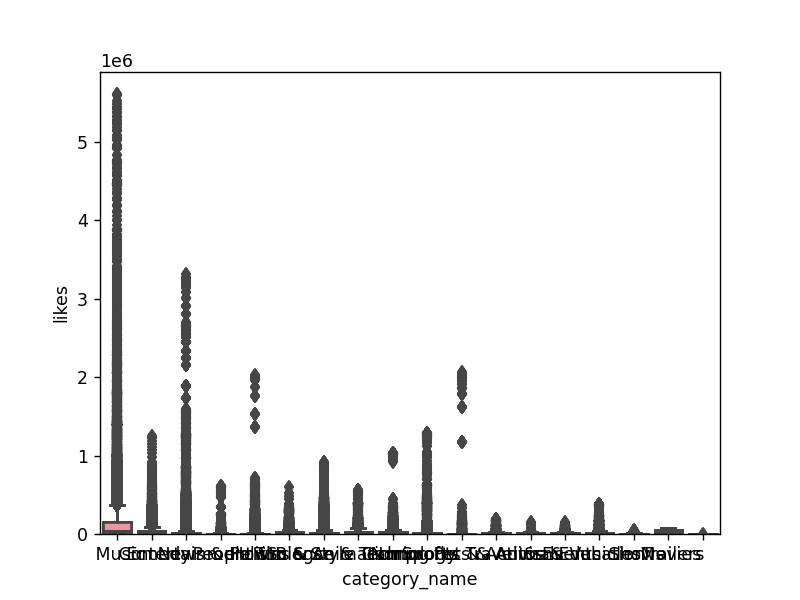

In [107]:
plt.bar(emojis,freqs)
plt.show()

In [108]:
!pip install plotly
import plotly.graph_objs as go

In [110]:
from plotly.offline import iplot

In [117]:
trace=go.Bar(x=emojis,y=freqs)
trace

Bar({
    'x': ['😂', '😍', '❤', '🔥', '😊', '👍', '💖', '😭', '💕', '👏'], 'y': [610, 323, 268, 68, 68, 56, 54, 52, 51, 47]
})

In [118]:
iplot([trace])  #iplot means interactive plot

# Lets Collect the Entire Data of Youtube

What is OS Module?

https://www.tutorialsteacher.com/python/os-module#:~:text=The%20OS%20module%20in%20Python,with%20the%20underlying%20operating%20system.

In [144]:
import os

In [145]:
path=r'C:\Users\Admin\Desktop\Youtube analysis Project\YT Data\additional_data'

In [146]:
files= os.listdir(path)

In [147]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [148]:
files_csv=[files[i] for i in range(0,len(files),2)]
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [149]:
files_csv[0].split(".")[0][0:2] #to extract country names

'CA'

In [150]:
full_df=pd.DataFrame()

for files in files_csv:
    current_df=pd.read_csv(path+'/'+files, encoding='iso-8859-1',error_bad_lines=False)
    current_df['country']=files.split(".")[0][0:2]
    full_df=pd.concat([full_df,current_df])

C:\Users\Admin\AppData\Local\Temp\ipykernel_14972\2125026256.py:4: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\Admin\AppData\Local\Temp\ipykernel_14972\2125026256.py:4: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\Admin\AppData\Local\Temp\ipykernel_14972\2125026256.py:4: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\Admin\AppData\Local\Temp\ipykernel_14972\2125026256.py:4: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\Admin\AppData\Local\Temp\ipykernel_14972\2125026256.py:4: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future vers

In [139]:
full_df.head(10)

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   
5  0yIWz1XEeyc      17.14.11   
6  _uM5kFfkhB8      17.14.11   
7  2kyS6SvSYSE      17.14.11   
8  JzCsM1vtn78      17.14.11   
9  43sm-QwLcx4      17.14.11   

                                               title     channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©        EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail         iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...      Rudy Mancuso   
3                           I Dare You: GOING BALD!?          nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)        Ed Sheeran   
5  Jake Paul Says Alissa Violet CHEATED with LOGA...        DramaAlert   
6             Vanoss Superhero School - New Students      VanossGaming   
7                 WE WANT TO TALK ABOUT OUR MARRIAGE      CaseyNeistat   
8               THE LOGANG MADE HISTORY. LOL. AGAIN.  Logan Paul Vlogs   
9  Finally Sheldon is winning an argument about t...       Sheikh Musa   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   
5           25  2017-11-13T07:37:51.000Z   
6           23  2017-11-12T23:52:13.000Z   
7           22  2017-11-13T17:13:01.000Z   
8           24  2017-11-12T20:19:24.000Z   
9           22  2017-11-10T14:10:46.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   
5  #DramaAlert|"Drama"|"Alert"|"DramaAlert"|"keem...   1309699   103755   
6  Funny Moments|"Montage video games"|"gaming"|"...   2987945   187464   
7                                    SHANtell martin    748374    57534   
8  logan paul vlog|"logan paul"|"logan"|"paul"|"o...   4477587   292837   
9               God|"Sheldon Cooper"|"Young Sheldon"    505161     4135   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   
5      4613          12143  https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg   
6      9850          26629  https://i.ytimg.com/vi/_uM5kFfkhB8/default.jpg   
7      2967          15959  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
8      4123          36391  https://i.ytimg.com/vi/JzCsM1vtn78/default.jpg   
9       976           1484  https://i.ytimg.com/vi/43sm-QwLcx4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   
5              False             False                   False   
6              False             False                   False   
7              False             False                   False   
8              False             False                   False   
9       

In [152]:
full_df.shape

(375942, 17)


# Which category has the maximum likes?

In [162]:
cat=pd.read_csv(r'C:\Users\Admin\Desktop\Youtube analysis Project\YT Data/category_file.txt', sep= ":",error_bad_lines=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14972\3768705373.py:1: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.





In [170]:
cat.reset_index(inplace=True)
cat
cat.set_index(inplace=True)

ValueError: cannot insert level_0, already exists

In [167]:
cat.columns=["category_id","category_name"]

ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

In [171]:
cat1=cat=pd.read_csv(r'C:\Users\Admin\Desktop\Youtube analysis Project\YT Data/category_file.txt', sep= ":",error_bad_lines=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14972\2675383290.py:1: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.





In [172]:
cat


Category_id      Category_name
1            \t\tFilm & Animation
2            \t\tAutos & Vehicles
10                      \t\tMusic
15             \t\tPets & Animals
17                     \t\tSports
18               \t\tShort Movies
19            \t\tTravel & Events
20                     \t\tGaming
21              \t\tVideoblogging
22             \t\tPeople & Blogs
23                     \t\tComedy
24              \t\tEntertainment
25            \t\tNews & Politics
26              \t\tHowto & Style
27                  \t\tEducation
28       \t\tScience & Technology
29      \t\tNonprofits & Activism
30                     \t\tMovies
31            \t\tAnime/Animation
32           \t\tAction/Adventure
33                   \t\tClassics
34                     \t\tComedy
35                \t\tDocumentary
36                      \t\tDrama
37                     \t\tFamily
38                    \t\tForeign
39                     \t\tHorror
40             \t\tSci-Fi/Fantasy
41                   \t\tThriller
42                     \t\tShorts
43                      \t\tShows
44       \t\tTrailers

In [173]:
cat.reset_index(inplace=True)

In [174]:
cat

index Category_id      Category_name
0       1           \t\tFilm & Animation
1       2           \t\tAutos & Vehicles
2      10                      \t\tMusic
3      15             \t\tPets & Animals
4      17                     \t\tSports
5      18               \t\tShort Movies
6      19            \t\tTravel & Events
7      20                     \t\tGaming
8      21              \t\tVideoblogging
9      22             \t\tPeople & Blogs
10     23                     \t\tComedy
11     24              \t\tEntertainment
12     25            \t\tNews & Politics
13     26              \t\tHowto & Style
14     27                  \t\tEducation
15     28       \t\tScience & Technology
16     29      \t\tNonprofits & Activism
17     30                     \t\tMovies
18     31            \t\tAnime/Animation
19     32           \t\tAction/Adventure
20     33                   \t\tClassics
21     34                     \t\tComedy
22     35                \t\tDocumentary
23     36                      \t\tDrama
24     37                     \t\tFamily
25     38                    \t\tForeign
26     39                     \t\tHorror
27     40             \t\tSci-Fi/Fantasy
28     41                   \t\tThriller
29     42                     \t\tShorts
30     43                      \t\tShows
31     44       \t\tTrailers

In [175]:
cat1.columns=["category_id","category_name"]

In [176]:
cat1

category_id               category_name
0             1        \t\tFilm & Animation
1             2        \t\tAutos & Vehicles
2            10                   \t\tMusic
3            15          \t\tPets & Animals
4            17                  \t\tSports
5            18            \t\tShort Movies
6            19         \t\tTravel & Events
7            20                  \t\tGaming
8            21           \t\tVideoblogging
9            22          \t\tPeople & Blogs
10           23                  \t\tComedy
11           24           \t\tEntertainment
12           25         \t\tNews & Politics
13           26           \t\tHowto & Style
14           27               \t\tEducation
15           28    \t\tScience & Technology
16           29   \t\tNonprofits & Activism
17           30                  \t\tMovies
18           31         \t\tAnime/Animation
19           32        \t\tAction/Adventure
20           33                \t\tClassics
21           34                  \t\tComedy
22           35             \t\tDocumentary
23           36                   \t\tDrama
24           37                  \t\tFamily
25           38                 \t\tForeign
26           39                  \t\tHorror
27           40          \t\tSci-Fi/Fantasy
28           41                \t\tThriller
29           42                  \t\tShorts
30           43                   \t\tShows
31           44    \t\tTrailers

In [180]:
cat1.set_index("category_id",inplace=True)

KeyError: "None of ['category_id'] are in the columns"

In [181]:
cat1

category_name
category_id                            
1                  \t\tFilm & Animation
2                  \t\tAutos & Vehicles
10                            \t\tMusic
15                   \t\tPets & Animals
17                           \t\tSports
18                     \t\tShort Movies
19                  \t\tTravel & Events
20                           \t\tGaming
21                    \t\tVideoblogging
22                   \t\tPeople & Blogs
23                           \t\tComedy
24                    \t\tEntertainment
25                  \t\tNews & Politics
26                    \t\tHowto & Style
27                        \t\tEducation
28             \t\tScience & Technology
29            \t\tNonprofits & Activism
30                           \t\tMovies
31                  \t\tAnime/Animation
32                 \t\tAction/Adventure
33                         \t\tClassics
34                           \t\tComedy
35                      \t\tDocumentary
36                            \t\tDrama
37                           \t\tFamily
38                          \t\tForeign
39                           \t\tHorror
40                   \t\tSci-Fi/Fantasy
41                         \t\tThriller
42                           \t\tShorts
43                            \t\tShows
44             \t\tTrailers

In [182]:
cat.to_dict()

{'category_name': {1: ' \t\tFilm & Animation',
  2: ' \t\tAutos & Vehicles',
  10: ' \t\tMusic',
  15: ' \t\tPets & Animals',
  17: ' \t\tSports',
  18: ' \t\tShort Movies',
  19: ' \t\tTravel & Events',
  20: ' \t\tGaming',
  21: ' \t\tVideoblogging',
  22: ' \t\tPeople & Blogs',
  23: ' \t\tComedy',
  24: ' \t\tEntertainment',
  25: ' \t\tNews & Politics',
  26: ' \t\tHowto & Style',
  27: ' \t\tEducation',
  28: ' \t\tScience & Technology',
  29: ' \t\tNonprofits & Activism',
  30: ' \t\tMovies',
  31: ' \t\tAnime/Animation',
  32: ' \t\tAction/Adventure',
  33: ' \t\tClassics',
  34: ' \t\tComedy',
  35: ' \t\tDocumentary',
  36: ' \t\tDrama',
  37: ' \t\tFamily',
  38: ' \t\tForeign',
  39: ' \t\tHorror',
  40: ' \t\tSci-Fi/Fantasy',
  41: ' \t\tThriller',
  42: ' \t\tShorts',
  43: ' \t\tShows',
  44: ' \t\tTrailers            '}}

In [183]:
cat=pd.read_csv(r'C:\Users\Admin\Desktop\Youtube analysis Project/category_file.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Admin\\Desktop\\Youtube analysis Project/category_file.csv'

In [184]:
cat=pd.read_csv(r'C:\Users\Admin\Desktop\Youtube analysis Project/category_file.txt',sep= ":")

In [185]:
cat

Category_id      Category_name
1                Film & Animation
2                Autos & Vehicles
10                          Music
15                 Pets & Animals
17                         Sports
18                   Short Movies
19                Travel & Events
20                         Gaming
21                  Videoblogging
22                 People & Blogs
23                         Comedy
24                  Entertainment
25                News & Politics
26                  Howto & Style
27                      Education
28           Science & Technology
29          Nonprofits & Activism
30                         Movies
31                Anime/Animation
32               Action/Adventure
33                       Classics
34                         Comedy
35                    Documentary
36                          Drama
37                         Family
38                        Foreign
39                         Horror
40                 Sci-Fi/Fantasy
41                       Thriller
42                         Shorts
43                          Shows
44           Trailers

In [186]:
cat.reset_index(inplace=True)

In [187]:
cat


index Category_id      Category_name
0       1               Film & Animation
1       2               Autos & Vehicles
2      10                          Music
3      15                 Pets & Animals
4      17                         Sports
5      18                   Short Movies
6      19                Travel & Events
7      20                         Gaming
8      21                  Videoblogging
9      22                 People & Blogs
10     23                         Comedy
11     24                  Entertainment
12     25                News & Politics
13     26                  Howto & Style
14     27                      Education
15     28           Science & Technology
16     29          Nonprofits & Activism
17     30                         Movies
18     31                Anime/Animation
19     32               Action/Adventure
20     33                       Classics
21     34                         Comedy
22     35                    Documentary
23     36                          Drama
24     37                         Family
25     38                        Foreign
26     39                         Horror
27     40                 Sci-Fi/Fantasy
28     41                       Thriller
29     42                         Shorts
30     43                          Shows
31     44           Trailers

In [188]:
cat.columns=["category_id","category_name"]

In [189]:
cat

category_id           category_name
0             1        Film & Animation
1             2        Autos & Vehicles
2            10                   Music
3            15          Pets & Animals
4            17                  Sports
5            18            Short Movies
6            19         Travel & Events
7            20                  Gaming
8            21           Videoblogging
9            22          People & Blogs
10           23                  Comedy
11           24           Entertainment
12           25         News & Politics
13           26           Howto & Style
14           27               Education
15           28    Science & Technology
16           29   Nonprofits & Activism
17           30                  Movies
18           31         Anime/Animation
19           32        Action/Adventure
20           33                Classics
21           34                  Comedy
22           35             Documentary
23           36                   Drama
24           37                  Family
25           38                 Foreign
26           39                  Horror
27           40          Sci-Fi/Fantasy
28           41                Thriller
29           42                  Shorts
30           43                   Shows
31           44    Trailers

In [190]:
cat.set_index(["category_id"],inplace=True)

In [191]:
cat

category_name
category_id                        
1                  Film & Animation
2                  Autos & Vehicles
10                            Music
15                   Pets & Animals
17                           Sports
18                     Short Movies
19                  Travel & Events
20                           Gaming
21                    Videoblogging
22                   People & Blogs
23                           Comedy
24                    Entertainment
25                  News & Politics
26                    Howto & Style
27                        Education
28             Science & Technology
29            Nonprofits & Activism
30                           Movies
31                  Anime/Animation
32                 Action/Adventure
33                         Classics
34                           Comedy
35                      Documentary
36                            Drama
37                           Family
38                          Foreign
39                           Horror
40                   Sci-Fi/Fantasy
41                         Thriller
42                           Shorts
43                            Shows
44             Trailers

In [192]:
dct=cat.to_dict()

In [193]:
dct

{'category_name': {1: ' Film & Animation',
  2: ' Autos & Vehicles',
  10: ' Music',
  15: ' Pets & Animals',
  17: ' Sports',
  18: ' Short Movies',
  19: ' Travel & Events',
  20: ' Gaming',
  21: ' Videoblogging',
  22: ' People & Blogs',
  23: ' Comedy',
  24: ' Entertainment',
  25: ' News & Politics',
  26: ' Howto & Style',
  27: ' Education',
  28: ' Science & Technology',
  29: ' Nonprofits & Activism',
  30: ' Movies',
  31: ' Anime/Animation',
  32: ' Action/Adventure',
  33: ' Classics',
  34: ' Comedy',
  35: ' Documentary',
  36: ' Drama',
  37: ' Family',
  38: ' Foreign',
  39: ' Horror',
  40: ' Sci-Fi/Fantasy',
  41: ' Thriller',
  42: ' Shorts',
  43: ' Shows',
  44: ' Trailers            '}}

In [196]:
full_df["category_name"]=full_df["category_id"].map(dct["category_name"])

In [197]:
full_df

video_id trending_date  \
0      n1WpP7iowLc      17.14.11   
1      0dBIkQ4Mz1M      17.14.11   
2      5qpjK5DgCt4      17.14.11   
3      d380meD0W0M      17.14.11   
4      2Vv-BfVoq4g      17.14.11   
...            ...           ...   
40944  BZt0qjTWNhw      18.14.06   
40945  1h7KV2sjUWY      18.14.06   
40946  D6Oy4LfoqsU      18.14.06   
40947  oV0zkMe1K8s      18.14.06   
40948  ooyjaVdt-jA      18.14.06   

                                                   title  \
0            Eminem - Walk On Water (Audio) ft. BeyoncÃ©   
1                          PLUSH - Bad Unboxing Fan Mail   
2      Racist Superman | Rudy Mancuso, King Bach & Le...   
3                               I Dare You: GOING BALD!?   
4            Ed Sheeran - Perfect (Official Music Video)   
...                                                  ...   
40944                       The Cat Who Caught the Laser   
40945                         True Facts : Ant Mutualism   
40946  I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...   
40947                How Black Panther Should Have Ended   
40948  Official Call of DutyÂ®: Black Ops 4 âÂ Mult...   

                  channel_title  category_id              publish_time  \
0                    EminemVEVO           10  2017-11-10T17:00:03.000Z   
1                     iDubbbzTV           23  2017-11-13T17:00:00.000Z   
2                  Rudy Mancuso           23  2017-11-12T19:05:24.000Z   
3                      nigahiga           24  2017-11-12T18:01:41.000Z   
4                    Ed Sheeran           10  2017-11-09T11:04:14.000Z   
...                         ...          ...                       ...   
40944             AaronsAnimals           15  2018-05-18T13:00:04.000Z   
40945                  zefrank1           22  2018-05-18T01:00:06.000Z   
40946                Brad Mondo           24  2018-05-18T17:34:22.000Z   
40947  How It Should Have Ended            1  2018-05-17T17:00:04.000Z   
40948              Call of Duty           20  2018-05-17T17:09:38.000Z   

                                                    tags     views    likes  \
0      Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1      plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2      racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3      ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4      edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   
...                                                  ...       ...      ...   
40944  aarons animals|"aarons"|"animals"|"cat"|"cats"...   1685609    38160   
40945                                             [none]   1064798    60008   
40946  I gave safiya nygaard a perfect hair makeover ...   1066451    48068   
40947  Black Panther|"HISHE"|"Marvel"|"Infinity War"|...   5660813   192957   
40948      call of duty|"cod"|"activision"|"Black Ops 4"  10306119   357079   

       dislikes  comment_count  \
0         43420         125882   
1          1688          13030   
2          5339           8181   
3          1989          17518   
4         21082          85067   
...         ...            ...   
40944      1385           2657   
40945       382           3936   
40946      1032           3992   
40947      2846          13088   
40948    212976         144795   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg              False   
1      https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg              False   
2      https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg              False   
3      https://i.ytimg.com/vi/d380meD0W0M/default.jpg              False   
4      https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg              False   
...                                               ...                ...   
40944  https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg              False   
4

# Which Category has maximum likes?

<IPython.core.display.Javascript object>


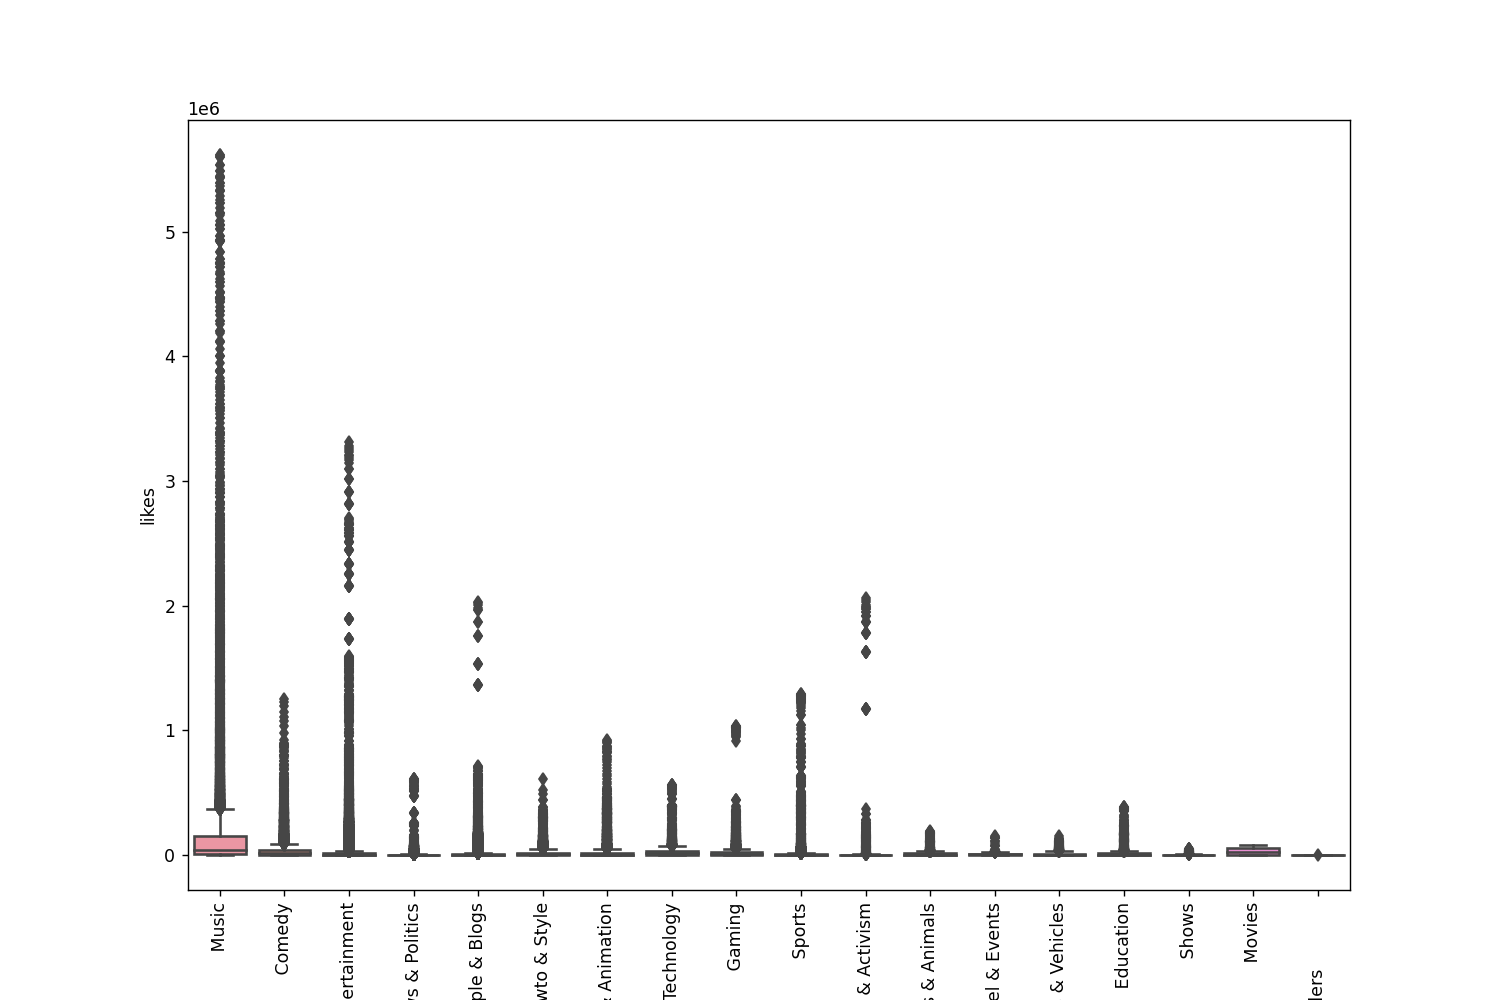

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

In [202]:
plt.figure(figsize=(12,8))
sns.boxplot(x="category_name",y="likes",data=full_df)
plt.xticks(rotation="vertical")


# Let's find out whether the audio is engaged or not?

In [203]:
full_df.columns


Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'category_name'],
      dtype='object')

In [205]:
full_df["likes_rate"]=(full_df["likes"]/full_df["views"])*100

In [206]:
full_df["dislikes_rate"]=(full_df["dislikes"]/full_df["views"])*100

In [207]:
full_df["cmnt_count_rate"]=(full_df["comment_count"]/full_df["views"])*100

In [208]:
full_df.head(3)

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651  127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146035   

   dislikes  ...                                  thumbnail_link  \
0     43420  ...  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688  ...  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339  ...  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   

  comments_disabled  ratings_disabled  video_error_or_removed  \
0             False             False                   False   
1             False             False                   False   
2             False             False                   False   

                                         description country category_name  \
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA         Music   
1  STill got a lot of packages. Probably will las...      CA        Comedy   
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...      CA        Comedy   

  likes_rate  dislikes_rate  cmnt_count_rate  
0   4.589104       0.253051         0.733639  
1  12.594873       0.166363         1.284185  
2   4.575843       0.167292         0.256342  

[3 rows x 21 columns]

<IPython.core.display.Javascript object>


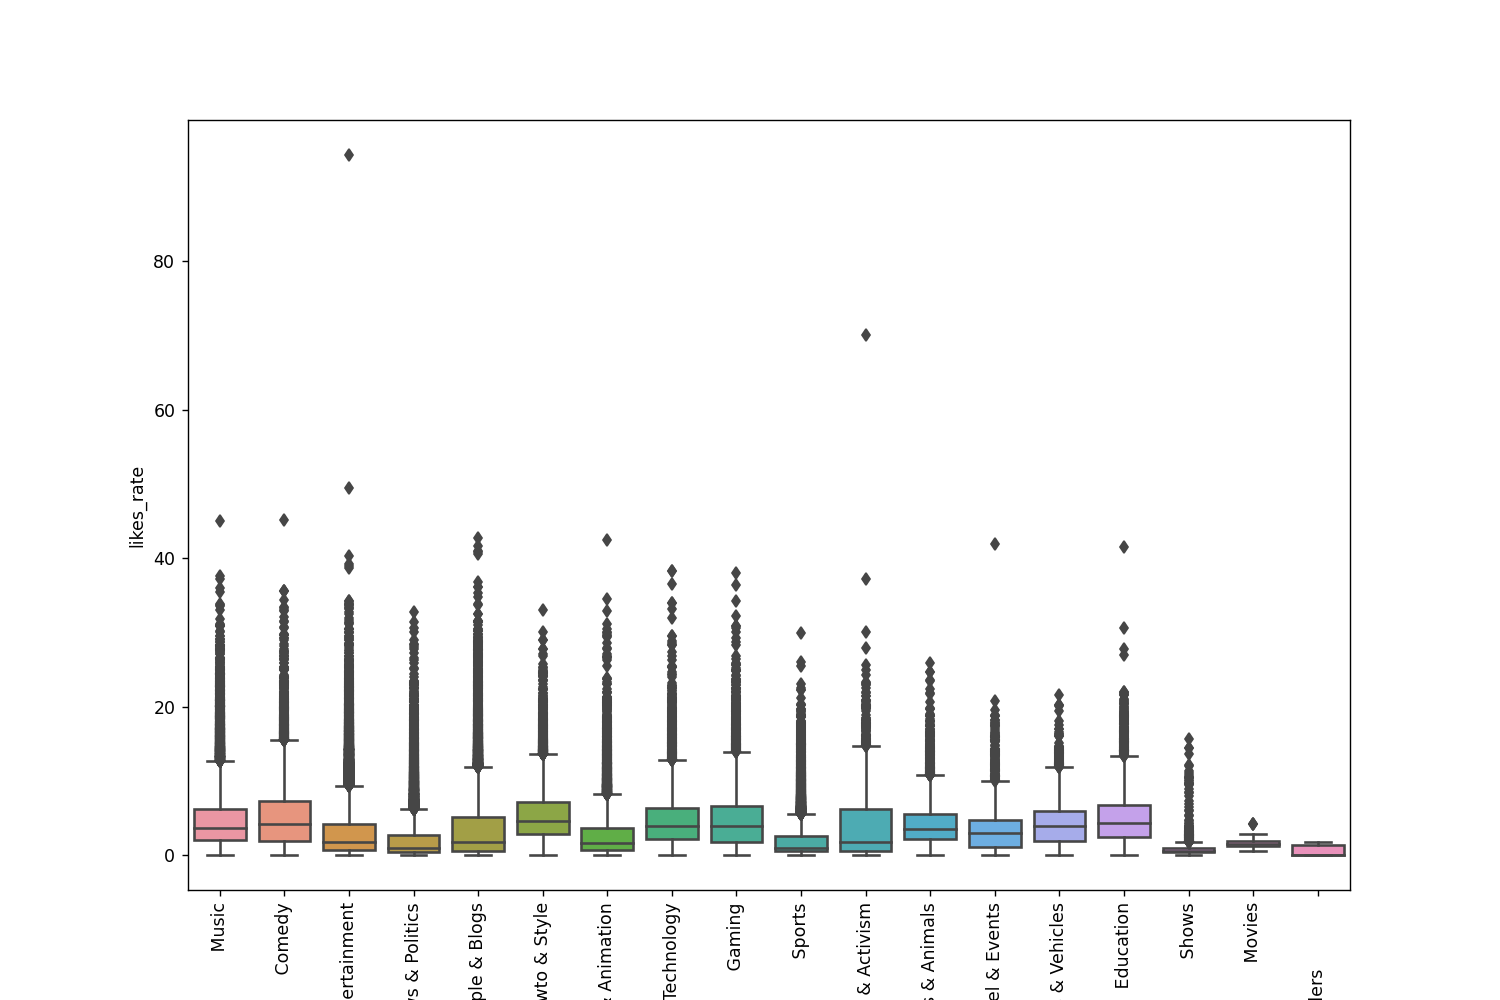

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

In [209]:
plt.figure(figsize=(12,8))
sns.boxplot(x="category_name",y="likes_rate",data=full_df)
plt.xticks(rotation="vertical")


<IPython.core.display.Javascript object>


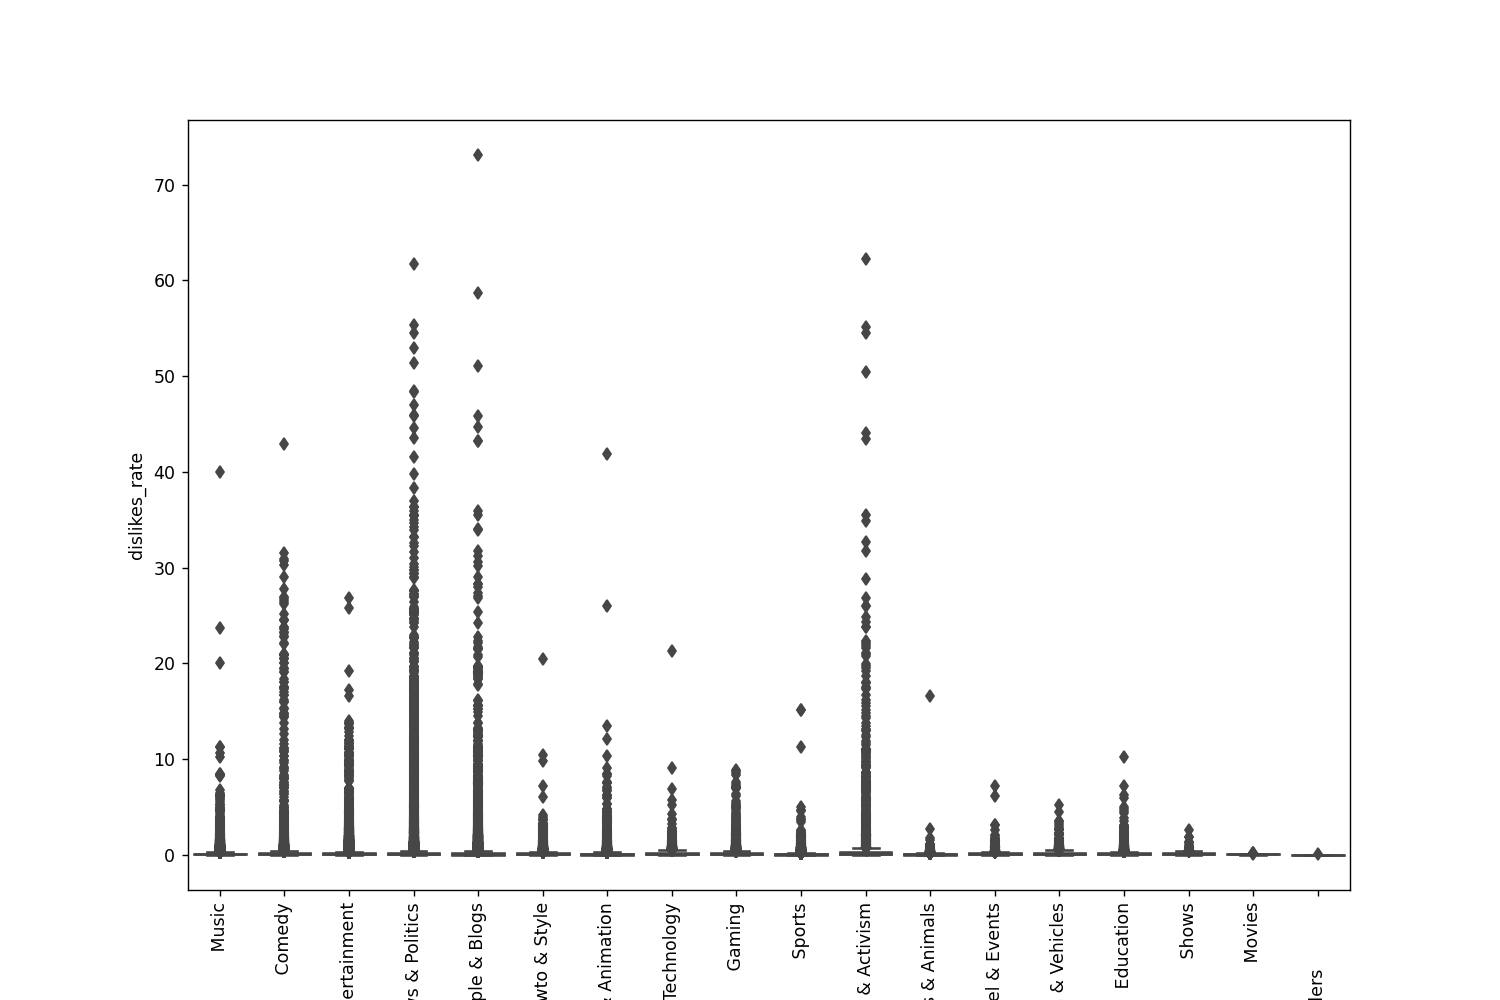

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

In [210]:
plt.figure(figsize=(12,8))
sns.boxplot(x="category_name",y="dislikes_rate",data=full_df)
plt.xticks(rotation="vertical")


<IPython.core.display.Javascript object>


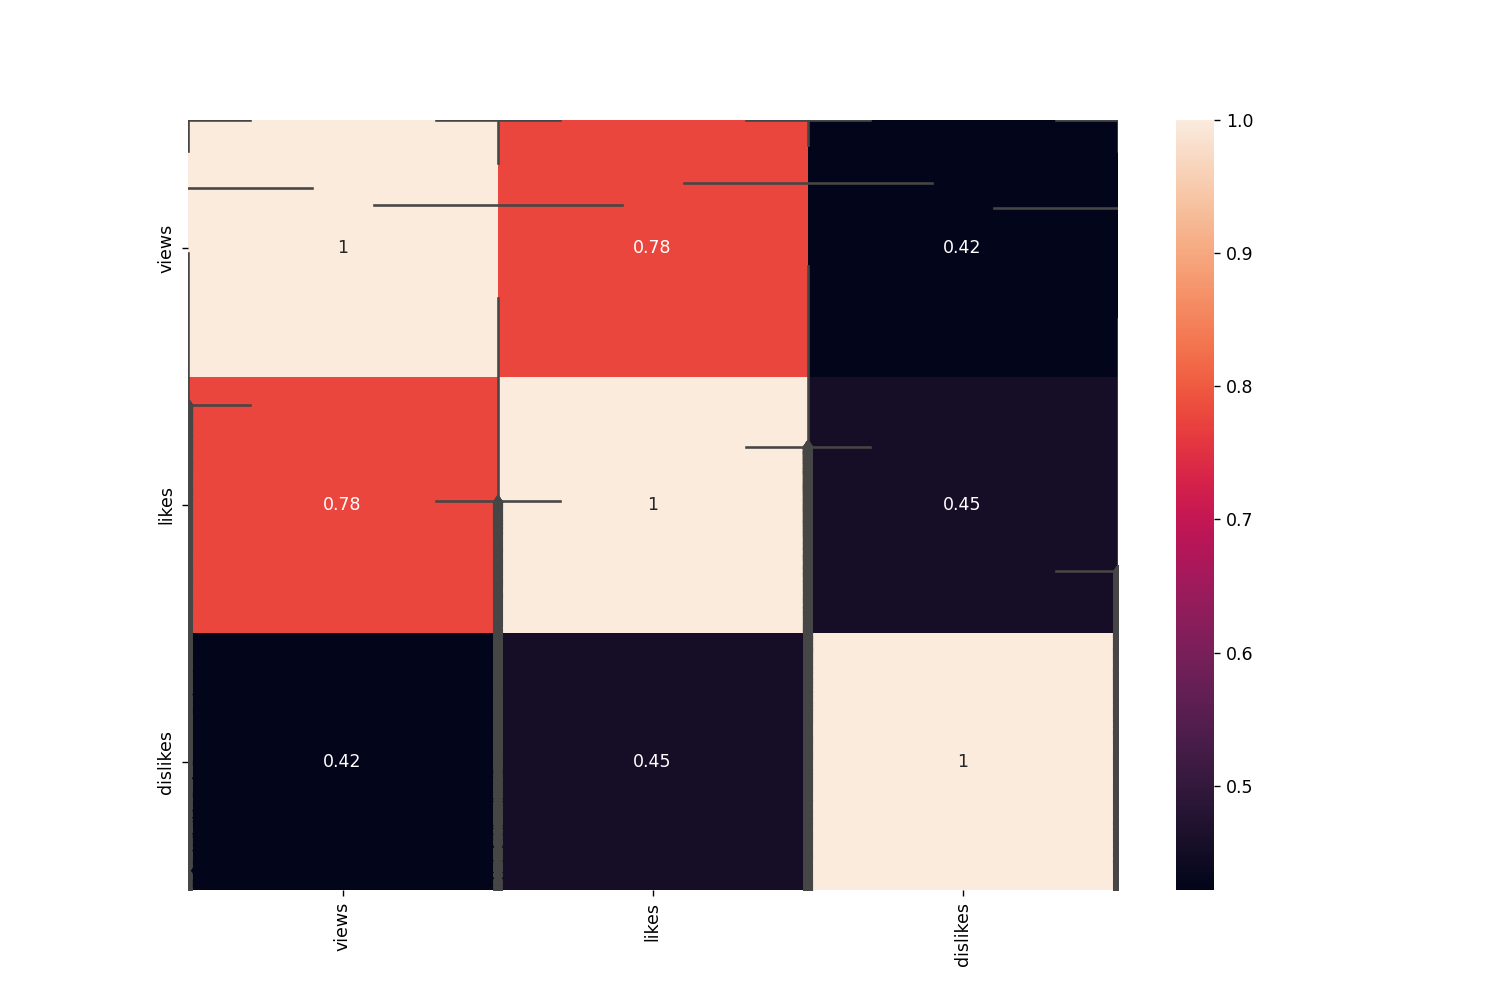

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

In [211]:
plt.figure(figsize=(12,8))
sns.boxplot(x="category_name",y="cmnt_count_rate",data=full_df)
plt.xticks(rotation="vertical")


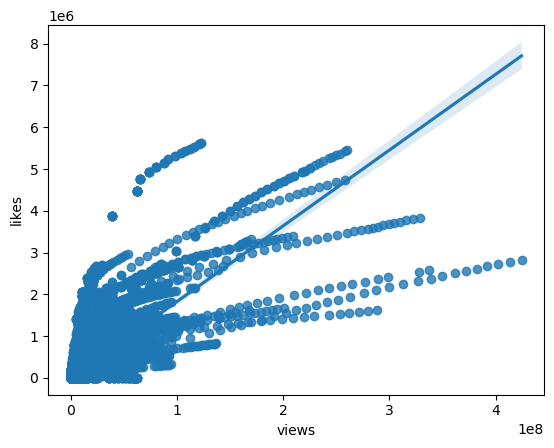

In [222]:
%matplotlib inline
sns.regplot(data=full_df,x="views",y="likes")
plt.show()

In [249]:
full_df["views"].corr(full_df["likes"])


0.7777960285630154

In [2]:
full_df[["views","likes"]].corr()

NameError: name 'full_df' is not defined

In [215]:
full_df[["views","likes","dislikes"]].corr()

views     likes  dislikes
views     1.000000  0.777796  0.421653
likes     0.777796  1.000000  0.453710
dislikes  0.421653  0.453710  1.000000

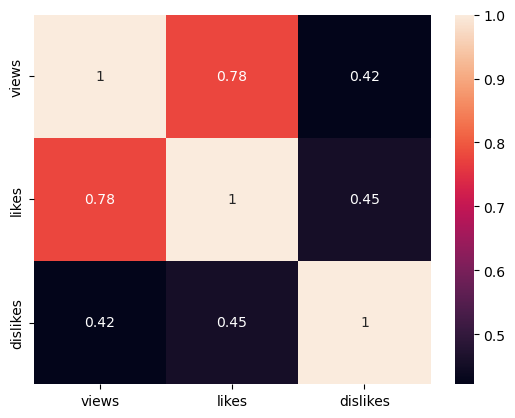

In [223]:
sns.heatmap(full_df[["views","likes","dislikes"]].corr(),annot=True)
plt.show()

# Analysing Trending Videos

In [224]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'category_name',
       'likes_rate', 'dislikes_rate', 'cmnt_count_rate'],
      dtype='object')

In [240]:
cdf=full_df.groupby(["channel_title"])['video_id'].count().sort_values(ascending=False).to_frame().reset_index().rename(columns={"video_id":"total_videos"})
cdf

channel_title  total_videos
0      The Late Show with Stephen Colbert           984
1                                     WWE           804
2             Late Night with Seth Meyers           773
3                               VikatanTV           763
4                            TheEllenShow           743
...                                   ...           ...
37819                   LIGHTS - 001 jrny             1
37820                          bangtanist             1
37821                      LIGAMX Femenil             1
37822             LIGA COLOMBIANA OFICIAL             1
37823                    Pavel Sidorik TV             1

[37824 rows x 2 columns]

In [242]:
import plotly.express as px

In [251]:
px.bar(data_frame=cdf[0:20],x='channel_title',y="total_videos")

# Does Punctuations have an effect on Likes,Dislikes and Views?

In [247]:
full_df['title']

0              Eminem - Walk On Water (Audio) ft. BeyoncÃ©
1                            PLUSH - Bad Unboxing Fan Mail
2        Racist Superman | Rudy Mancuso, King Bach & Le...
3                                 I Dare You: GOING BALD!?
4              Ed Sheeran - Perfect (Official Music Video)
                               ...                        
40944                         The Cat Who Caught the Laser
40945                           True Facts : Ant Mutualism
40946    I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...
40947                  How Black Panther Should Have Ended
40948    Official Call of DutyÂ®: Black Ops 4 âÂ Mult...
Name: title, Length: 375942, dtype: object

In [248]:
full_df['title'][0]

0          Eminem - Walk On Water (Audio) ft. BeyoncÃ©
0    Sing zu Ende! | Gesangseinlagen vom Feinsten |...
0             Malika LePen : Femme de Gauche - Trailer
0        John Lewis Christmas Ad 2017 - #MozTheMonster
0    Sharry Mann: Cute Munda ( Song Teaser) | Parmi...
0    é¸èªããªãåç´ã«è½ä¸ï¼è·¯ä¸ã®è»ã...
0             ì¢ì by ë¯¼ì_ì¤ì¢
ì _ì¢ë ëµê°
0                       CapÃ­tulo 12 | MasterChef 2017
0    ÐÐ°Ñ
Ð°Ñ Ð¸ ÐÐ¾Ð»Ð¸Ð½Ð° ÑÑÐ°ÑÑÑ ÑÐºÐ¾...
0                   WE WANT TO TALK ABOUT OUR MARRIAGE
Name: title, dtype: object

In [253]:
import string


In [256]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [257]:
sample=full_df[1:10000]

In [259]:
def punc_count(x):
    return len([text for text in x if text in string.punctuation])

In [260]:
punc_count("Shiv Baba, Supreme-Soul")

2

In [263]:
sample["punc_count"]=sample["title"].apply(punc_count)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14972\52479273.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [264]:
sample.head()

video_id trending_date  \
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   
5  0yIWz1XEeyc      17.14.11   

                                               title channel_title  \
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   
5  Jake Paul Says Alissa Violet CHEATED with LOGA...    DramaAlert   

   category_id              publish_time  \
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   
5           25  2017-11-13T07:37:51.000Z   

                                                tags     views    likes  \
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   
5  #DramaAlert|"Drama"|"Alert"|"DramaAlert"|"keem...   1309699   103755   

   dislikes  ...  comments_disabled ratings_disabled  video_error_or_removed  \
1      1688  ...              False            False                   False   
2      5339  ...              False            False                   False   
3      1989  ...              False            False                   False   
4     21082  ...              False            False                   False   
5      4613  ...              False            False                   False   

                                         description  country  \
1  STill got a lot of packages. Probably will las...       CA   
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...       CA   
3  I know it's been a while since we did this sho...       CA   
4  ð§: https://ad.gt/yt-perfect\nð°: https://...       CA   
5  âº Follow for News! - https://twitter.com/KEE...       CA   

      category_name likes_rate dislikes_rate  cmnt_count_rate  punc_count  
1            Comedy  12.594873      0.166363         1.284185           1  
2            Comedy   4.575843      0.167292         0.256342           3  
3     Entertainment   6.309630      0.094903         0.835851           3  
4             Music   4.874563      0.062887         0.253752           3  
5   News & Politics   7.922049      0.352218         0.927160           3  

[5 rows x 22 columns]

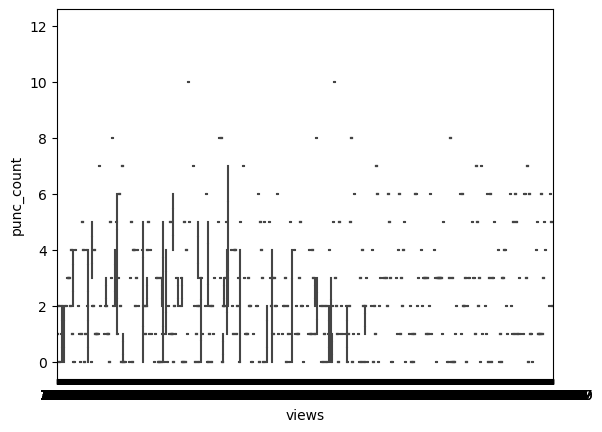

In [268]:
%matplotlib inline
sns.boxplot(data=sample,x="views",y="punc_count")
plt.show()

In [267]:
sample["punc_count"].corr(sample["views"])

0.06482053930089247